# Data Loading and preprocessing

# Handling missing Values & Data Cleaning

# Descriptive Statistics and Summary

# Visualization (Univariate, biviriate, multivariate)

# Insight on Chrun Behavior

> Add blockquote



In [15]:
# load important libraries for EDA Project

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# lets load the data into  df variable

In [18]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
# As we see , the data is huge . so all columns no showing
# So lets check the total columns name

In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
# lets check the shape of data

In [23]:
df.shape

(7043, 21)

In [24]:
# The data set contains 7043 rows indicate custmores with 21 features
# Each row represent a unique customer with various attributes
# related to demographic, services , and billing
# the dataset size is sufficient for meanigful analysis and prediction
# With 21 features , we have a good mix of categorical and numerical
# to explore custmmer behavior and churn pattern

In [25]:
# lets check data type of each feature

In [26]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [27]:
# most of the columns are categorical (object type)
# Seniorcitizen is stored as int64 , but since its binary variable
# 0 & 1 it can be treated as categorical
# Total charges is stores as an objects , which seems incorrect
# since it represent a numerical values
# It may cantain missing values or be formetted incorrect
# We need to convert it to float for proper analysis

In [28]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [29]:
# Cehck the conversion

In [30]:
df['TotalCharges'].dtype

dtype('float64')

In [31]:
#check for missing values in each columns

In [32]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [33]:
# Only one columns Total Charges has missing values
# 11 missing values
# since Total charges is numerical , these missing values were
# likely empty spaces in original dataset before conversion
# posible ways to handle missing values :-
# 1-Fill them with median or mean of TotalCharges
# fill them with zero , but total charges not be zero
# Drop these 11 rows, but if we do 11 custmors also drop
# from 7043 . we may loss data
# So better to fill the missing values
# fill them with median because meadian is good if we any may contain
# outliers

In [34]:
df['TotalCharges'].median()

1397.475

In [35]:
# so lets check the missing values agian

In [36]:
df ['TotalCharges'].isnull().sum()

np.int64(11)

In [37]:
# lets check for the duplicate records

In [38]:
df.duplicated().sum()

np.int64(0)

In [40]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [41]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [42]:

categorical_col= [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [43]:
for i in categorical_col:
  print(f"Unique Values in {i} is :-")
  print (df[i].unique(),"\n")
  print("-------------------")

Unique Values in gender is :-
['Female' 'Male'] 

-------------------
Unique Values in SeniorCitizen is :-
[0 1] 

-------------------
Unique Values in Partner is :-
['Yes' 'No'] 

-------------------
Unique Values in Dependents is :-
['No' 'Yes'] 

-------------------
Unique Values in tenure is :-
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

-------------------
Unique Values in PhoneService is :-
['No' 'Yes'] 

-------------------
Unique Values in MultipleLines is :-
['No phone service' 'No' 'Yes'] 

-------------------
Unique Values in InternetService is :-
['DSL' 'Fiber optic' 'No'] 

-------------------
Unique Values in OnlineSecurity is :-
['No' 'Yes' 'No internet service'] 

-------------------
Unique Values in OnlineBackup is :-
['Yes' 'No' 'No internet service'] 

-------------------
Unique Values in

In [44]:
# lets check for the distribution of numerical feature
# aslo check the outliers

Text(0.5, 1.0, 'MonthlyCharges')

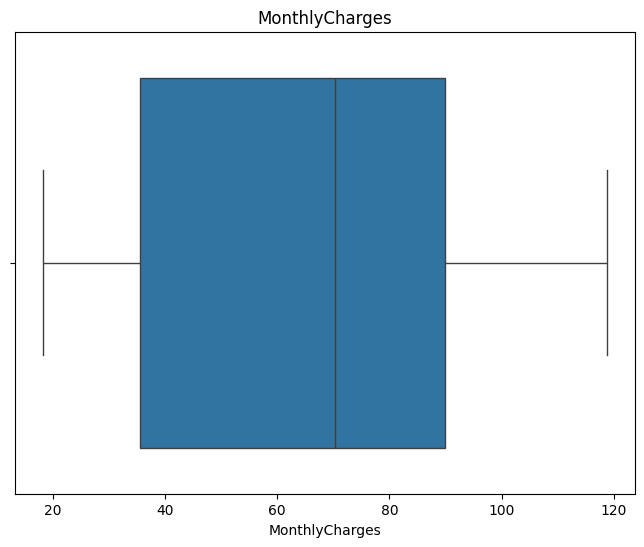

In [45]:
plt.figure(figsize =(8,6))
sns.boxplot(data = df,x='MonthlyCharges')
plt.title("MonthlyCharges")

Text(0.5, 1.0, 'TotalCharges')

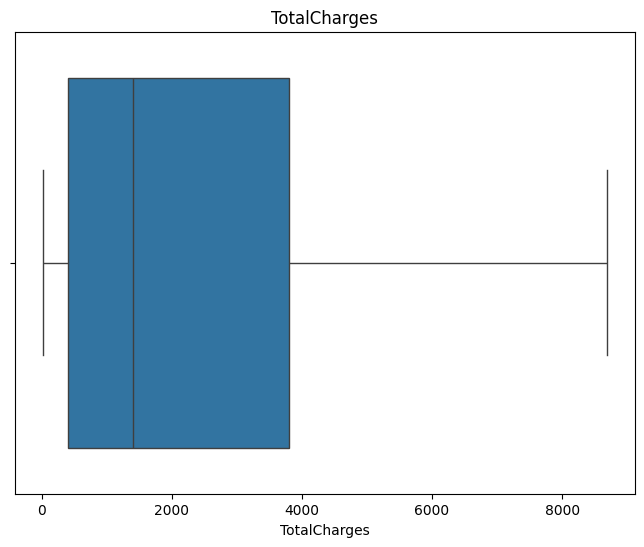

In [46]:
plt.figure(figsize =(8,6))
sns.boxplot(data = df,x='TotalCharges')
plt.title("TotalCharges")

In [47]:
# Since there are no outliers in the Monthly Charges and total Charges
# This is the clean data distribution
# No extreme values distorting the distribution
# This mean data is alrady well behaved for satticasl analyis and  modeling
# No need for transformation or removal

In [48]:
df[["TotalCharges","MonthlyCharges","tenure"]].describe()

,TotalCharges,MonthlyCharges,tenure
count,7032.000000,7043.000000,7043.000000
mean,2283.300441,64.761692,32.371149
std,2266.771362,30.090047,24.559481
min,18.800000,18.250000,0.000000
25%,401.450000,35.500000,9.000000
50%,1397.475000,70.350000,29.000000
75%,3794.737500,89.850000,55.000000
max,8684.800000,118.750000,72.000000


In [49]:
# The avrage of totalcharges per customer is 2281.91
# and the median i.e. middle values is 1397.48, which is signficatnly
# indicate than median is lower  than mean i.e. right skew disrtibution
# the monthly charges aslo little bit left skew
# The median tenure is 29 month. maximum customer is for long term

In [50]:
# to understand the  distribution of tenure among customer

In [51]:
# Histogram/kde plot

Text(0.5, 1.0, 'Distribution of tenure among customer')

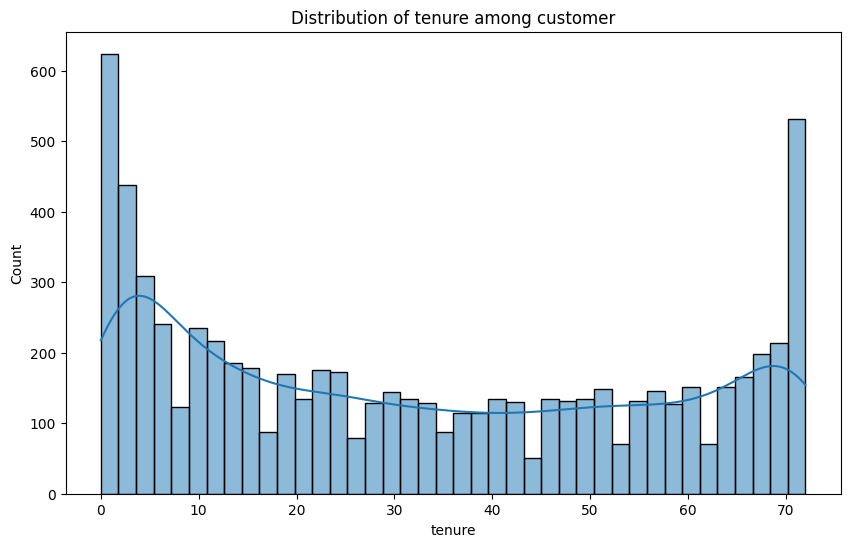

In [52]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='tenure',kde=True,bins=40)
plt.title("Distribution of tenure among customer")

In [53]:
# the fact that the distribution looks unifrom,suggest that customers are
# evenly disrtibuted accross differnt  tenure range
# so lets check for the monthly charges and total charges distribution

ValueError: Could not interpret value `MOnthlyCharges` for `x`. An entry with this name does not appear in `data`.

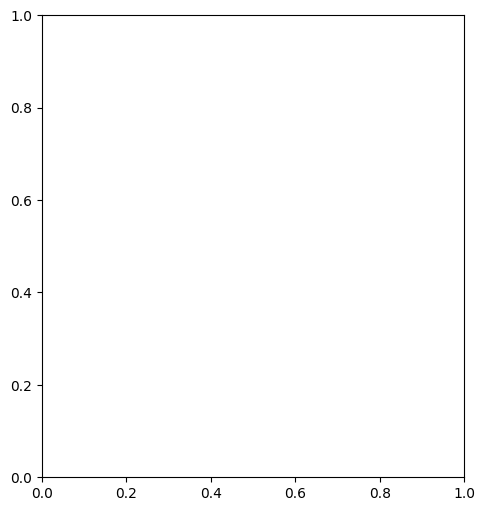

In [56]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(data=df,x="MOnthlyCharges",kde=True, bins=40)
plt.title("Distribution of monthly charges")

plt.subplot(1,2,2)
sns.histplot(data = df ,x="TotalCharges",kde=True,bins=40)
plt.title(("Distribution of monthly charges"))


In [57]:
# MonthlyCharges -symmetric distribution
# spread accross 18 to 118
# total charges - right skewed with many
# low  charges cutomers

In [58]:
# lests check for the categorical columns

In [59]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [61]:
df['Contract'].value_counts()


,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [62]:
sns.countplot(data = df ,x = 'Contract',hue='Chrun ', palette='viridis')
plt.title("Cutomers count by Contract")

ValueError: Could not interpret value `Chrun ` for `hue`. An entry with this name does not appear in `data`.

In [64]:
df.groupby ("Contract")["Churn"].value_counts().unstack()

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [65]:
df.groupby ("Contract")["Churn"].value_counts(normalize=True).unstack()

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [67]:
# Majority of customers approx 42% are on moth to month conatract which
# is potential churn
# one year and two year congtract indicting highers stability
# business impication - custmoers on month to month contracts
# may need layality discount to commit a longer contract
# long - term customers should be rewarded with better benifits to maintain
# retntion